In [1]:
#POWER GENERATION

import pandas as pd
pd.set_option('display.max_rows', None)  # Show all rows for variable understanding
pd.set_option('display.max_columns', None)  # Show all columns for variable understanding

#Specifinge path to CSV file
file_path = '/Users/katerinadenyakina/Desktop/Individual Project/datasets/df_merged.csv'

#Load SCADA dataset file into a pandas DataFrame
df_merged = pd.read_csv(file_path)

df_mergedColumnAnalysis = pd.DataFrame({"columns": df_merged.columns,
                                 "data Type": df_merged.dtypes.values,
                                 "Total Count": df_merged.count().values,
                                 "Unique Count": df_merged.nunique().values
                                })
df_mergedColumnAnalysis

,columns,data Type,Total Count,Unique Count
0,Turbine_ID,float64,125277,4
1,Timestamp,object,125277,33461
2,Gen_RPM_Max,float64,125277,9368
3,Gen_RPM_Min,float64,125277,8734
4,Gen_RPM_Avg,float64,125277,12981
5,Gen_RPM_Std,float64,125277,4707
6,Gen_Bear_Temp_Avg,float64,125277,76
7,Gen_Phase1_Temp_Avg,float64,125277,127
8,Gen_Phase2_Temp_Avg,float64,125277,120
9,Gen_Phase3_Temp_Avg,float64,125277,118


In [2]:
# Convert the 'Timestamp' column to datetime format
df_merged['Timestamp'] = pd.to_datetime(df_merged['Timestamp'])

# Converting 'Timestamp' column as it is  time-series data to use in ML
df_merged['month'] = df_merged['Timestamp'].dt.month
df_merged['day'] = df_merged['Timestamp'].dt.day
df_merged['hour'] = df_merged['Timestamp'].dt.hour
df_merged['minute'] = df_merged['Timestamp'].dt.minute
df_merged['second'] = df_merged['Timestamp'].dt.second

In [3]:
# Drop the 'Timestamp' column
df_merged.drop('Timestamp', axis=1, inplace=True)

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Target variables for prediction
target_columns = [
    'Prod_LatestAvg_ActPwrGen0', 'Prod_LatestAvg_ActPwrGen1', 
    'Prod_LatestAvg_ActPwrGen2', 'Prod_LatestAvg_TotActPwr', 
    'Grd_Prod_Pwr_Avg', 'Grd_Prod_Pwr_Max', 'Grd_Prod_Pwr_Min', 
    'Prod_LatestAvg_ReactPwrGen0', 'Prod_LatestAvg_ReactPwrGen1',
    'Prod_LatestAvg_ReactPwrGen2', 'Prod_LatestAvg_TotReactPwr'
]

# Assuming all other columns are relevant for the analysis and numeric
features = df_merged.drop(columns=target_columns)

# Targets are the columns we want to predict
targets = df_merged[target_columns]

# Splitting dataset into training and testing sets chronologically
split_point = int(len(df_merged) * 0.8)
X_train, X_test = features.iloc[:split_point], features.iloc[split_point:]
y_train, y_test = targets.iloc[:split_point], targets.iloc[split_point:]

# Initializing the RandomForest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_regressor.fit(X_train, y_train)

# Predicting on the test set
predictions = rf_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Display feature importances
feature_importance = rf_regressor.feature_importances_
print("Feature importances:")
for i, col in enumerate(features.columns):
    print(f"{col}: {feature_importance[i]}")


Mean Squared Error: 280492.6483806129
R^2 Score: 0.9898616112929512
Feature importances:
Turbine_ID: 4.1859286069825827e-07
Gen_RPM_Max: 6.286470915260159e-07
Gen_RPM_Min: 5.419704002602691e-06
Gen_RPM_Avg: 6.63631531605839e-05
Gen_RPM_Std: 8.955674730054188e-07
Gen_Bear_Temp_Avg: 8.819818751681919e-07
Gen_Phase1_Temp_Avg: 1.0363307843417613e-06
Gen_Phase2_Temp_Avg: 9.939616138799405e-07
Gen_Phase3_Temp_Avg: 9.713824087075502e-07
Hyd_Oil_Temp_Avg: 2.932985027471686e-07
Gear_Oil_Temp_Avg: 4.59080359332485e-07
Gear_Bear_Temp_Avg: 3.6080994216384584e-06
Nac_Temp_Avg: 1.7237711596379385e-07
Rtr_RPM_Max: 5.342635030319422e-07
Rtr_RPM_Min: 5.285372916044914e-06
Rtr_RPM_Avg: 3.139265000128214e-05
Amb_WindSpeed_Max: 5.969836183103901e-07
Amb_WindSpeed_Min: 7.874971371351138e-07
Amb_WindSpeed_Avg: 5.381717897989395e-07
Amb_WindSpeed_Std: 3.776646331444316e-07
Amb_WindDir_Relative_Avg: 4.80957061494572e-07
Amb_WindDir_Abs_Avg: 3.774011025355432e-07
Amb_Temp_Avg: 1.6416201180983716e-07
HVTrafo_Ph

/Users/katerinadenyakina/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


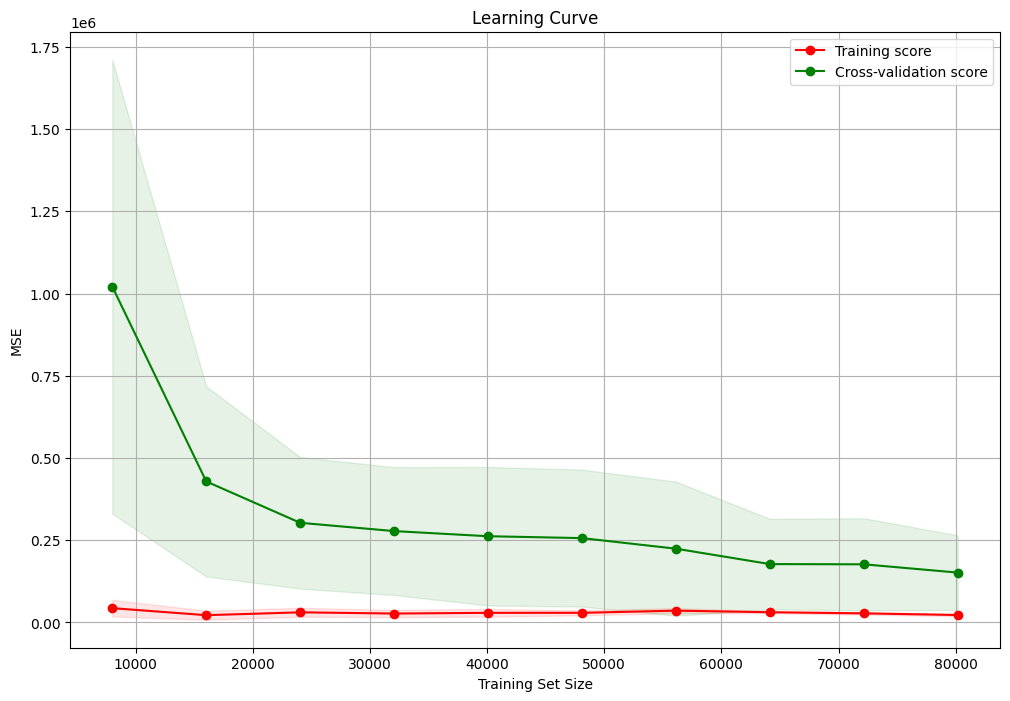

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor

#Target variables for prediction
target_columns = [
    'Prod_LatestAvg_ActPwrGen0', 'Prod_LatestAvg_ActPwrGen1', 
    'Prod_LatestAvg_ActPwrGen2', 'Prod_LatestAvg_TotActPwr', 
    'Grd_Prod_Pwr_Avg', 'Grd_Prod_Pwr_Max', 'Grd_Prod_Pwr_Min', 
    'Prod_LatestAvg_ReactPwrGen0', 'Prod_LatestAvg_ReactPwrGen1',
    'Prod_LatestAvg_ReactPwrGen2', 'Prod_LatestAvg_TotReactPwr'
]

features = df_merged.drop(columns=target_columns)
targets = df_merged[target_columns]

#Training and test sets
X_train, X_test = features.iloc[:split_point], features.iloc[split_point:]
y_train, y_test = targets.iloc[:split_point], targets.iloc[split_point:]

#Initialising RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

#Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

#Calculate the mean and standard deviation for training set scores
train_mean = np.mean(-train_scores, axis=1)
train_std = np.std(-train_scores, axis=1)

#Calculate the mean and standard deviation for validation set scores
test_mean = np.mean(-test_scores, axis=1)
test_std = np.std(-test_scores, axis=1)

#Plot the learning curve
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.grid(True)
plt.show()
